<h1>Machine Learning Classifiers</h1>
<h2>SciKlearn Library</h2>

<p> In this notebook, a dataset is analyzed with 3 machine learning algorithm, Gaussian Naive Bayes, Support Vector Machines and Decision Trees.</p>

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Function that returns the accuracy of the predictions
from sklearn.metrics import accuracy_score


In [11]:
#Function for graph the dataset and the model selected

def graph_points(train,clf=None):

    train0 = train[train['labels'] == 0]
    train1 = train[train['labels'] == 1]
    
    #Graph styles
    plt.figure(figsize=(10,10))
    plt.ylim(0,1.0)
    plt.xlim(0,1.0)
    
    sns.set_style("whitegrid")
    sns.set_style("ticks", {"xtick.major.size": 0.1, "ytick.major.size": 0.1})
    sns.set_context("notebook", font_scale=1.5)
    
    #Classifier select
    if clf is not None:
        x_min, x_max = 0, 1.001
        y_min, y_max = 0, 1.001
        
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001), np.arange(y_min, y_max, 0.001))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
        Z = Z.reshape(xx.shape)
        cm = plt.cm.RdBu       
        plt.contourf(xx, yy, Z, cmap=cm, alpha=.1)
    
    plt.scatter(train0['feature_X'], train0['feature_Y'], c='red')
    plt.scatter(train1['feature_X'], train1['feature_Y'], c='blue')
    return None

In [8]:
#Function that create the dataset

def makeTerrainData(n_points=600):
    #Function based in the function used in the Lesson Naives Bayes
    #from the Introduction to Machine Learning (Udacity).
    
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    labels = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(labels)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            labels[ii] = 1.0

### split into train/test sets
    feature_X = [ ii for ii in grade]
    feature_Y = [ ii for ii in bumpy]
    split = int(0.75*n_points)
    train = pd.DataFrame({'feature_X': feature_X[0:split],
                          'feature_Y': feature_Y[0:split],
                          'labels': labels[0:split]})
    test = pd.DataFrame({'feature_X': feature_X[split:],
                          'feature_Y': feature_Y[split:],
                          'labels': labels[split:]})
    return train, test

In [9]:
#Dataset Generation
train, test = makeTerrainData()

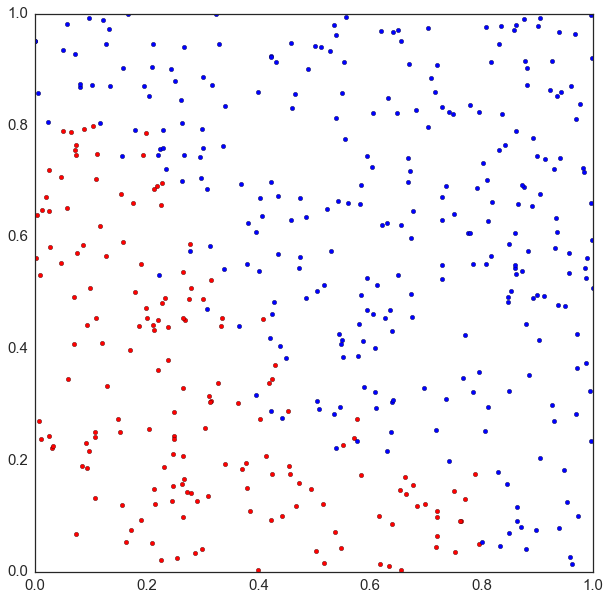

In [12]:
#Dataset Graph
graph_points(train)

Gaussian Naive Bayes accuracy:  0.886666666667


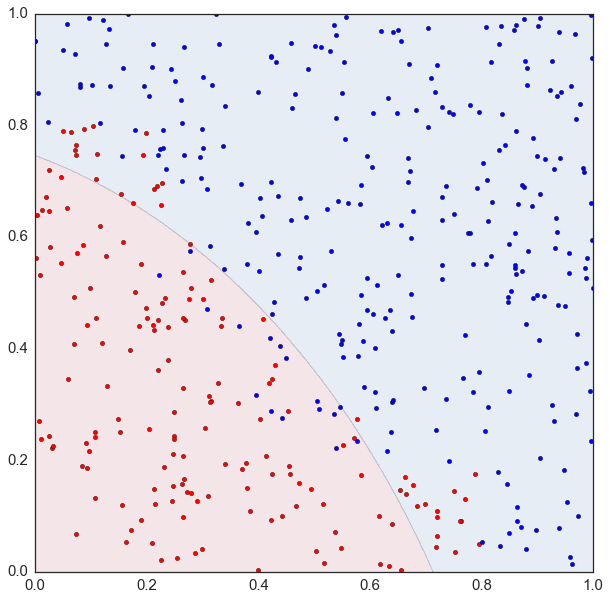

In [14]:
#Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

gauss_NB = GaussianNB()
gauss_NB.fit(train[['feature_X','feature_Y']],train['labels'])
gauss_NB_prediction = gauss_NB.predict(test[['feature_X','feature_Y']])

gauss_NB_accuracy = accuracy_score(test['labels'],gauss_NB_prediction)
print("Gaussian Naive Bayes accuracy: ", gauss_NB_accuracy )

graph_points(train,gauss_NB)

Support Vector Machines accuracy:  0.94


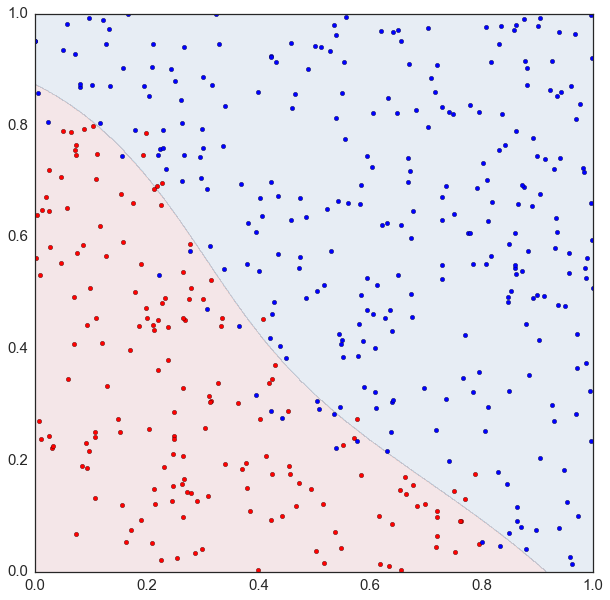

In [15]:
#Support Vector Machines Classifier
from sklearn import svm

SVC = svm.SVC(kernel = 'rbf', C= 1000)
SVC.fit(train[['feature_X','feature_Y']],train['labels'])
SVC_prediction = SVC.predict(test[['feature_X','feature_Y']])

SVC_accuracy = accuracy_score(test['labels'],SVC_prediction)
print("Support Vector Machines accuracy: ", SVC_accuracy )

graph_points(train,SVC)

Decision Tree accuracy:  0.92


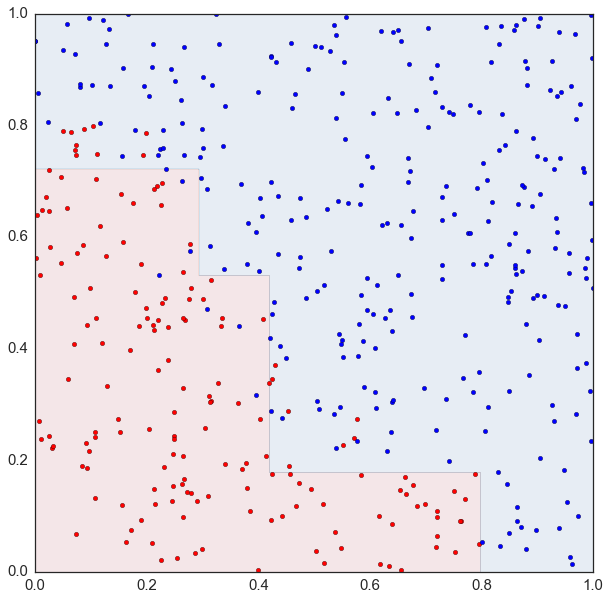

In [16]:
#Decision Tree Classifier
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier(min_samples_split=30)
decision_tree.fit(train[['feature_X','feature_Y']],train['labels'])
decision_tree_prediction = decision_tree.predict(test[['feature_X','feature_Y']])

decision_tree_accuracy = accuracy_score(test['labels'],decision_tree_prediction)
print("Decision Tree accuracy: ", decision_tree_accuracy )

graph_points(train,decision_tree)